We hypothesise that there will be two significant peaks in the greyscale intesity of the CT scans, due to edge effects: these will be at the boundary between air and the cementum, and at the cementum-dentine boundary.

To check this we will find 4 random images from 4 teeth, straighten them and plot the greyscale intensity along each row. Hopefully we will see these two peaks.

In [35]:
"""
Choose images

"""
import os
import numpy as np

rng = np.random.default_rng(seed=2)

# Pick four numbers for each tooth
indices = [
    *rng.integers(0, 108, 4),
    *rng.integers(108, 216, 4),
    *rng.integers(216, 316, 4),
    *rng.integers(316, 515, 4),
]

# Find the corresponding filepaths
img_paths = [f"data/original cut/{i:04d}.tif" for i in indices]
mask_paths = [f"data/masks cut/{i:04d}.tif" for i in indices]

for path in img_paths:
    assert os.path.exists(path), path

for path in mask_paths:
    assert os.path.exists(path), path

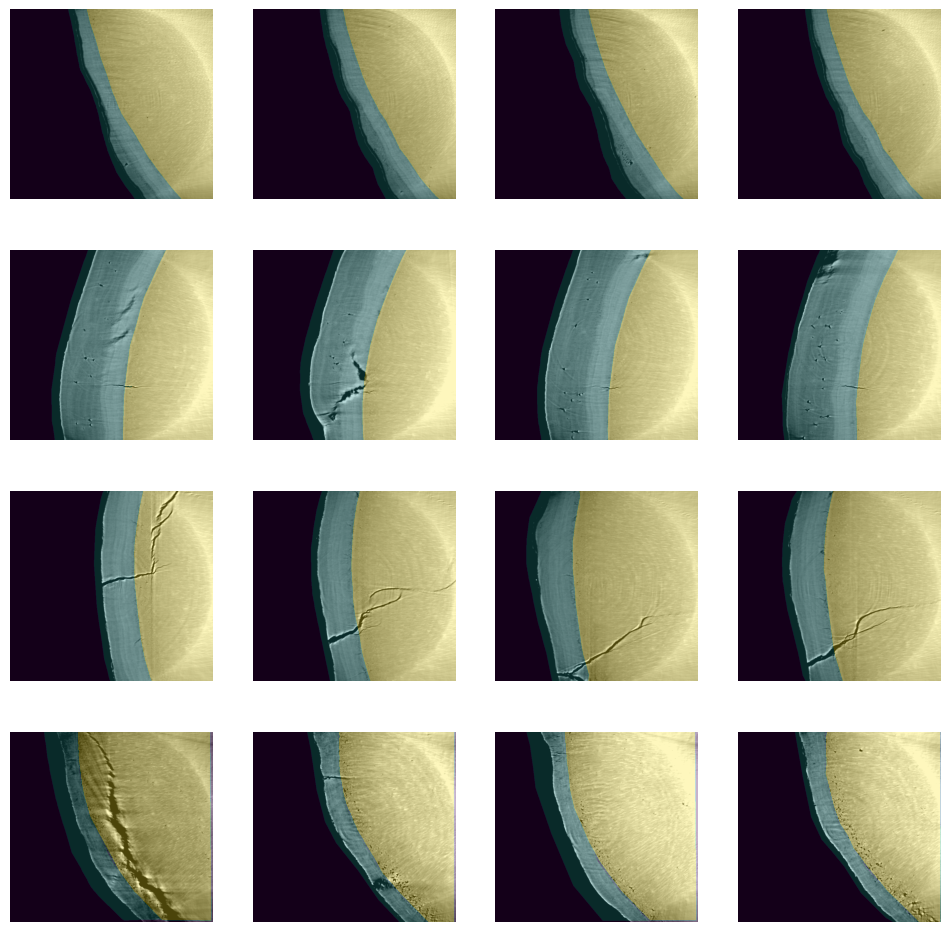

In [36]:
"""
Display them

"""
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for axis, img, mask in zip(axes.flat, img_paths, mask_paths):
    axis.imshow(plt.imread(img), cmap="gray")
    axis.imshow(plt.imread(mask), alpha=0.3)

    axis.set_axis_off()

 25%|██▌       | 4/16 [00:03<00:09,  1.29it/s]


AssertionError: There should only be two edges: found 21 at y=430: [132 133 362 363 364 365 366 367 368 369 370 371 372 373 374 375 380 381
 382 383 384] [  1 229   1   1   1   1   1   1   1   1   1   1   1   1   1   5   1   1
   1   1]

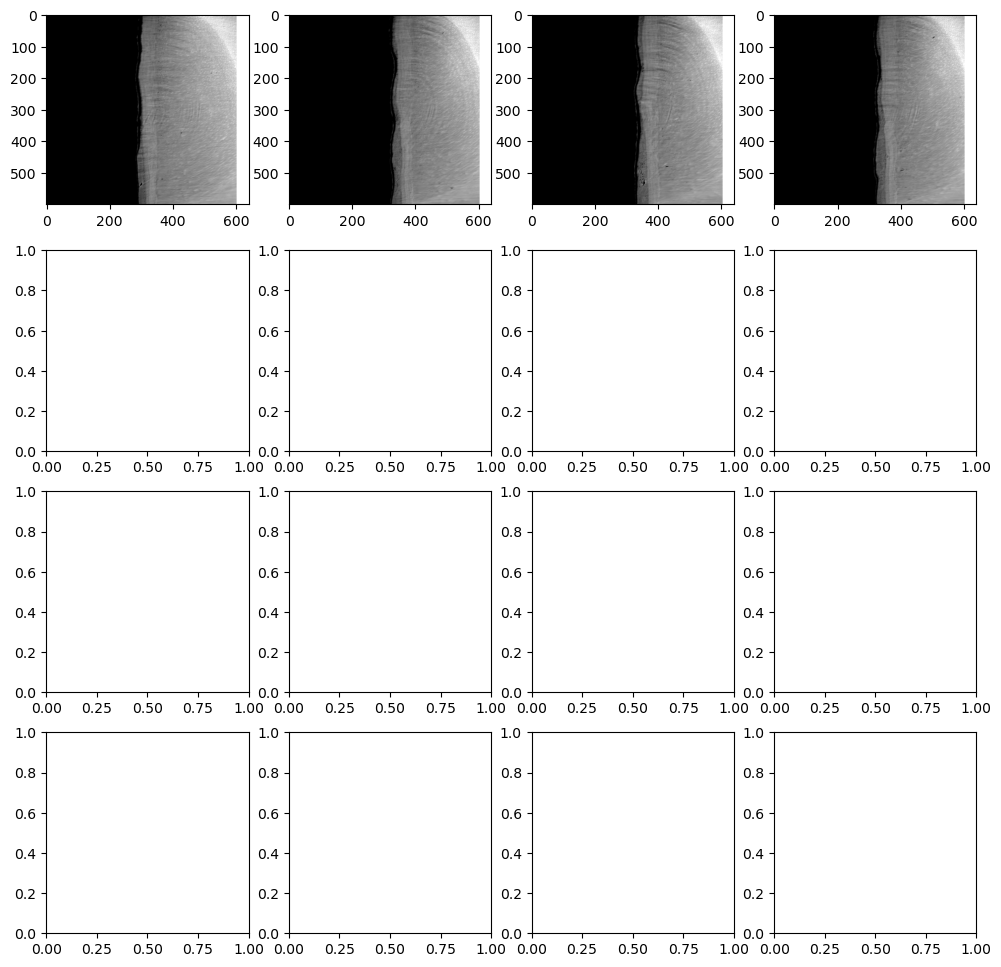

In [37]:
"""
Straighten these images according the the masks

"""
from tqdm import tqdm

from cementum import straighten

n_y = 20
n_left, n_x, n_right = 5, 5, 5

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

straight_images = []

for axis, img_path, mask_path in tqdm(
    zip(axes.flat, img_paths, mask_paths), total=len(img_paths)
):
    # Define two grids of points that will we use to perform our straightening
    mask = plt.imread(mask_path)
    curve_pts = straighten.mask_mesh(mask, n_y, (n_left, n_x, n_right))
    straight_pts = straighten.straight_mesh(mask, n_y, (n_left, n_x, n_right))

    # Straighten the image
    img = plt.imread(img_path)
    straight_images.append(
        straighten.apply_transformation(img, curve_pts, straight_pts)
    )

    # Display it
    axis.imshow(straight_images[-1], cmap="gray")